# HW1: Cancer Diagnosis Using Machine Learning 

In [1]:
# For auto completion
%config IPCompleter.greedy=True

In [2]:
# a) Read the dataset using pandas
import pandas as pd

cancer_df = pd.read_csv("https://github.com/mpourhoma/CS4662/raw/master/Cancer.csv")
# Display the data
cancer_df

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Malignant_Cancer
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
145,3,1,1,1,2,1,2,1,1,0
146,9,7,7,5,5,10,7,8,3,1
147,10,8,8,4,10,10,8,1,1,1
148,1,1,1,1,2,1,3,1,1,0


In [7]:
# b- Split into testing and Training Sets
# Features
features = cancer_df.columns.values[:-1]
# label
label = cancer_df.columns.values[-1]
# Define the test and train data
X = cancer_df[features]
y = cancer_df[label]

# Split Data using Sklearn function train_test_split
from sklearn.model_selection import train_test_split

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.3, random_state = 2)

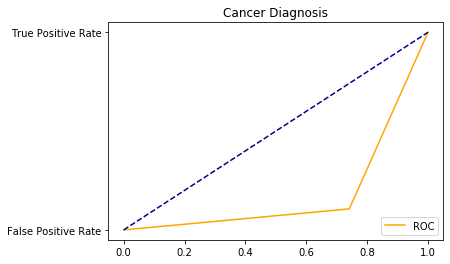

AUC: 0.8174981658107117
Accuracy Score: 0.8095238095238095


In [25]:
# c- Use Decision Tree Classifier  to Predict cancer based on previous Training and testing set
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

my_DecisionTree = DecisionTreeClassifier(random_state=2)
my_DecisionTree.fit(X_train, y_train)
y_predict = my_DecisionTree.predict(X_test)

# Get accuracy score of prediction
my_DecisionTree_score = accuracy_score(y_test, y_predict)

# Plot AUC of ROC Curve
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Takes in False Positive Rate(fpr) and True Positive rate(tpr)
auc = roc_auc_score(y_test, y_predict)

# Positive values from predictions
my_DecisionTree_probs = my_DecisionTree.predict_proba(X_test)
tpr, fpr, thresholds = metrics.roc_curve(y_test, my_DecisionTree_probs[:, 1])
# plot the curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.plot('False Positive Rate')
plt.plot('True Positive Rate')
plt.title('Cancer Diagnosis')
plt.legend()
plt.show()

print(f"AUC: {auc}")
print(f"Accuracy Score: {my_DecisionTree_score}")